# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of claim that have been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard Tableau would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answer AND the Tableau Dashboard Link to regitaz@gmail.com. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas.DataFrame as d

%matplotlib inline

In [306]:
df = pd.read_csv('tsa_claims.csv')

C:\Users\zefan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [307]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [308]:
df= df.iloc[0:51066,:]

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   51066 non-null  object
 1   Date Received  51066 non-null  object
 2   Incident Date  49346 non-null  object
 3   Airport Code   44285 non-null  object
 4   Airport Name   44285 non-null  object
 5   Airline Name   29624 non-null  object
 6   Claim Type     44282 non-null  object
 7   Claim Site     50910 non-null  object
 8   Item           50632 non-null  object
 9   Claim Amount   48719 non-null  object
 10  Status         51066 non-null  object
 11  Close Amount   45568 non-null  object
 12  Disposition    44752 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


In [310]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,51066,49346,44285,44285,29624,44282,50910,50632,48719,51066,45568,44752
unique,51065,637,1038,299,299,113,6,4,65,12585,8,8729,3
top,2004050450432,5-Dec-03,12/29/2003 0:00,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checked Baggage,Other,$100.00,Approved,$0.00,Approve in Full
freq,2,682,137,2535,2535,4829,21841,39006,15732,1601,16259,14172,16261


In [311]:
df.describe().transpose()

,count,unique,top,freq
Claim Number,51066,51065,2004050450432,2
Date Received,51066,637,5-Dec-03,682
Incident Date,49346,1038,12/29/2003 0:00,137
Airport Code,44285,299,LAX,2535
Airport Name,44285,299,Los Angeles International Airport,2535
Airline Name,29624,113,American Airlines,4829
Claim Type,44282,6,Property Damage,21841
Claim Site,50910,4,Checked Baggage,39006
Item,50632,65,Other,15732
Claim Amount,48719,12585,$100.00,1601


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [312]:
df.replace(to_replace="-",value=np.nan,inplace=True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [313]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Date Received']

0       2002-01-04
1       2002-02-02
2       2002-02-04
3       2002-02-07
4       2002-02-18
           ...    
51061   2004-12-02
51062   2004-12-02
51063   2004-12-02
51064   2004-12-02
51065   2004-12-02
Name: Date Received, Length: 51066, dtype: datetime64[ns]

In [314]:
df.dropna(thresh=2,inplace=True)
df.dropna(axis=0,subset=['Incident Date'],inplace=True)
df['Incident Date_NEW'] = pd.to_datetime(df['Incident Date'],errors='coerce').dt.date

In [315]:
df[df['Incident Date_NEW'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident Date_NEW
28862,0226594M,2004-02-26,03-SEP-0300 00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),$150.00,Canceled,NaN,NaN,NaT


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [316]:
df['Year Received'] = pd.DatetimeIndex(df['Date Received']).year
df['Incident Date']

0        12/12/2002 0:00
1         1/16/2004 0:00
2        11/26/2003 0:00
3          1/6/2003 0:00
4          2/5/2005 0:00
              ...       
51061    10/29/2004 0:00
51062    10/30/2004 0:00
51063    10/31/2004 0:00
51064     11/8/2004 0:00
51065      8/7/2004 0:00
Name: Incident Date, Length: 49346, dtype: object

In [317]:
# def cleanincidentdate (x):
#     return str(x['Year Received'])+"-"+str(x['Incident Date']).split("-")[0]+"-"+str(x['Incident Date']).split("-")[1]
df['Incident Date'] = pd.to_datetime(df['Incident Date'],errors='coerce')
df.dropna(axis=0,subset=['Incident Date'],inplace=True)

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49345 entries, 0 to 51065
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Claim Number       49345 non-null  object        
 1   Date Received      49345 non-null  datetime64[ns]
 2   Incident Date      49345 non-null  datetime64[ns]
 3   Airport Code       43777 non-null  object        
 4   Airport Name       43777 non-null  object        
 5   Airline Name       29418 non-null  object        
 6   Claim Type         43880 non-null  object        
 7   Claim Site         49213 non-null  object        
 8   Item               48947 non-null  object        
 9   Claim Amount       48239 non-null  object        
 10  Status             49345 non-null  object        
 11  Close Amount       44708 non-null  object        
 12  Disposition        44019 non-null  object        
 13  Incident Date_NEW  49345 non-null  object        
 14  Year R

In [319]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident Date_NEW,Year Received
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full,2002-12-12,2002
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle,2004-01-16,2002
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle,2003-11-26,2002
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,2003-01-06,2002
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full,2005-02-05,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2004122971527,2004-12-02,2004-10-29,TRI,Tri-Cities Regional,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$68.25,Approved,$68.25,Approve in Full,2004-10-29,2004
51062,2004122971530,2004-12-02,2004-10-30,MIA,Miami International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$80.00,Approved,$80.00,Approve in Full,2004-10-30,2004
51063,2004122971533,2004-12-02,2004-10-31,CLL,Easterwood/College Station; TX,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$325.67,Approved,$325.67,Approve in Full,2004-10-31,2004
51064,2004122971554,2004-12-02,2004-11-08,ABQ,Albuquerque International Sunport Airport,UAL,Passenger Property Loss,Checked Baggage,Locks,$14.36,Approved,$14.36,Approve in Full,2004-11-08,2004


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [320]:
df['Day Difference']=df['Date Received']-df['Incident Date']
df['Day Difference']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49345 entries, 0 to 51065
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Claim Number       49345 non-null  object         
 1   Date Received      49345 non-null  datetime64[ns] 
 2   Incident Date      49345 non-null  datetime64[ns] 
 3   Airport Code       43777 non-null  object         
 4   Airport Name       43777 non-null  object         
 5   Airline Name       29418 non-null  object         
 6   Claim Type         43880 non-null  object         
 7   Claim Site         49213 non-null  object         
 8   Item               48947 non-null  object         
 9   Claim Amount       48239 non-null  object         
 10  Status             49345 non-null  object         
 11  Close Amount       44708 non-null  object         
 12  Disposition        44019 non-null  object         
 13  Incident Date_NEW  49345 non-null  object     

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

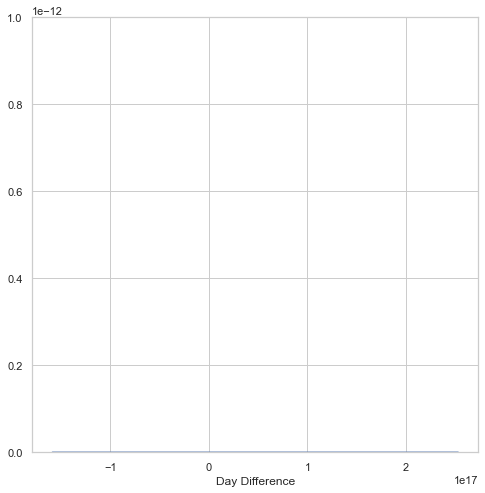

In [321]:
df.dropna(axis=0,subset=['Day Difference'],inplace=True)
sns.set(style='whitegrid')
plt.figure(figsize = (8,8))
sns.distplot(df['Day Difference'],kde=True,bins=200)

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

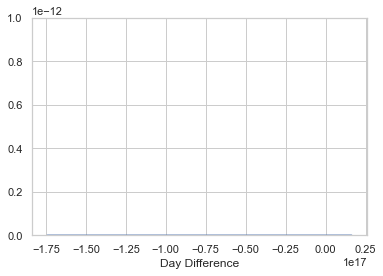

In [322]:
df['selisih hari']= pd.to_numeric(df['Day Difference'].dt.days, downcast='integer')
daydfunder0 = df[df['selisih hari']<0]
sns.distplot(daydfunder0['Day Difference'])
# sns.set(style='whitegrid')
# plt.figure(figsize = (8,8))
# sns.distplot(df['Day Difference'],bins=1000)
# plt.show()

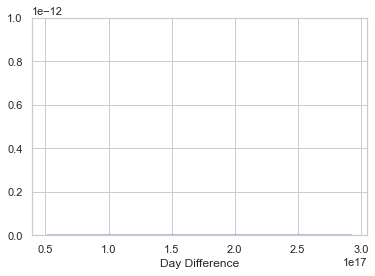

In [323]:
daydfover1000 = df[df['selisih hari']>1000]
sns.distplot(daydfover1000['Day Difference'])

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

There are a lot of reasons I could think of, some of them are Fraudulent Claims or technical issues at the data gathering point(Let's say the computer broke down when the claim was made and therefore, the data were input not in exact time the claims were made,maybe some time after). 

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [327]:
# def removesign(y):
#     return y['Claim Amount'].split("$")[1]

# df['Claim Amount_NEW']= pd.to_numeric(df['Claim Amount'], downcast='integer',errors='coerce')
# df['Close Amount-NEW']= pd.to_numeric(df['Close Amount'], downcast='integer',errors='coerce')
df['Claim Amount_NEW'] = (df['Claim Amount']).astype(str).str.replace('$',"")
df['Claim Amount_NEW'] = pd.to_numeric(df['Claim Amount_NEW'], downcast='float',errors='coerce')
df['Close Amount_NEW'] = (df['Close Amount']).astype(str).str.replace('$',"")
df['Close Amount_NEW'] = pd.to_numeric(df['Close Amount_NEW'], downcast='float',errors='coerce')
# df['Claim Amount_NEW']= pd.to_numeric(df['Claim Amount'], downcast='integer',errors='coerce')
# df['Close Amount-NEW']= pd.to_numeric(df['Close Amount'], downcast='integer',errors='coerce')
# df.info()

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [328]:
df['Amount Differences'] = df['Claim Amount_NEW'] - df['Close Amount_NEW']

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49345 entries, 0 to 51065
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Claim Number        49345 non-null  object         
 1   Date Received       49345 non-null  datetime64[ns] 
 2   Incident Date       49345 non-null  datetime64[ns] 
 3   Airport Code        43777 non-null  object         
 4   Airport Name        43777 non-null  object         
 5   Airline Name        29418 non-null  object         
 6   Claim Type          43880 non-null  object         
 7   Claim Site          49213 non-null  object         
 8   Item                48947 non-null  object         
 9   Claim Amount        48239 non-null  object         
 10  Status              49345 non-null  object         
 11  Close Amount        44708 non-null  object         
 12  Disposition         44019 non-null  object         
 13  Incident Date_NEW   49345 non-n

In [330]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,...,Disposition,Incident Date_NEW,Year Received,Day Difference,selisih hari,Claim Amount_NEW,Claim Amount-NEW,Close Amount_NEW,Close Amount-NEW,Amount Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,...,Approve in Full,2002-12-12,2002,-342 days,-342,350.000000,350.000000,350.000000,350.000000,0.000000
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,...,Settle,2004-01-16,2002,-713 days,-713,100.000000,100.000000,50.000000,50.000000,50.000000
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,...,Settle,2003-11-26,2002,-660 days,-660,278.880005,278.880005,227.919998,227.919998,50.960007
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,...,Approve in Full,2003-01-06,2002,-333 days,-333,50.000000,50.000000,50.000000,50.000000,0.000000
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,...,Approve in Full,2005-02-05,2002,-1083 days,-1083,84.790001,84.790001,84.790001,84.790001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2004122971527,2004-12-02,2004-10-29,TRI,Tri-Cities Regional,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$68.25,...,Approve in Full,2004-10-29,2004,34 days,34,68.250000,68.250000,68.250000,68.250000,0.000000
51062,2004122971530,2004-12-02,2004-10-30,MIA,Miami International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$80.00,...,Approve in Full,2004-10-30,2004,33 days,33,80.000000,80.000000,80.000000,80.000000,0.000000
51063,2004122971533,2004-12-02,2004-10-31,CLL,Easterwood/College Station; TX,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$325.67,...,Approve in Full,2004-10-31,2004,32 days,32,325.670013,325.670013,325.670013,325.670013,0.000000
51064,2004122971554,2004-12-02,2004-11-08,ABQ,Albuquerque International Sunport Airport,UAL,Passenger Property Loss,Checked Baggage,Locks,$14.36,...,Approve in Full,2004-11-08,2004,24 days,24,14.360000,14.360000,14.360000,14.360000,0.000000


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

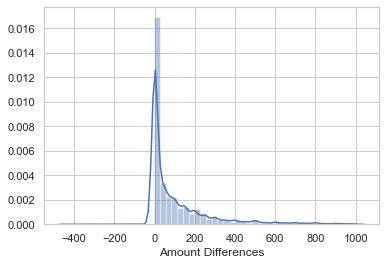

In [332]:
sns.distplot(df['Amount Differences'])

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [339]:
Q1_df = df['Amount Differences'].describe()['25%']
Q3_df = df['Amount Differences'].describe()['75%']
IQR = Q3_df - Q1_df
df[(df['Amount Differences'] >= Q1_df - (1.5*IQR)) & (df['Amount Differences'] <= Q3_df + (1.5 * IQR))]['Amount Differences'].shape

(36374,)

In [334]:
df['Claim Amount_NEW'].describe()

count    43047.000000
mean       198.428833
std        202.968567
min          0.000000
25%         51.360001
50%        125.000000
75%        270.000000
max        999.989990
Name: Claim Amount_NEW, dtype: float64

In [335]:
df['Close Amount_NEW'].describe()

count    43683.000000
mean        92.809349
std        146.277435
min          0.000000
25%          0.000000
50%         42.000000
75%        110.000000
max        997.750000
Name: Close Amount_NEW, dtype: float64

In [341]:
df.shape

(49345, 22)

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [340]:
df[(df['Amount Differences'] >= Q1_df - (1.5*IQR)) & (df['Amount Differences'] <= Q3_df + (1.5 * IQR))]['Amount Differences'].shape

(36374,)

There are 36374 rows of non-outlier data, while there are 49345 rows of filtered data, as we have run through above. It means 36374/49345*100%= ~75% of shipment is still 'normal'. Therefore, it means not as many people are claiming bigger money, as we thought before. So,it's a NO for this question. 

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [ ]:
sns.jointplot(x='Airline Name',y='Claim Number'.count)

In [270]:
df.to_excel('data.xlsx')